In [ ]:
###understand various things of David's package through experimentation, 

In [69]:
%matplotlib inline
import os 
os.chdir("/Users/Ismael/code/research/WeakLensingDeblending/")
import matplotlib.pyplot as plt

### Understanding fits files. 

In [2]:
%%bash
#produces demo.fits file with partials, 
./simulate.py --catalog-name OneDegSq.fits --image-width 512 --image-height 512 \
--survey-name LSST --filter-band i --output-name demo --verbose

Read 858502 catalog entries from OneDegSq.fits
Simulating LSST i-band survey with {'exposure_time': 6900.0, 'sky_brightness': 20.0, 'mirror_diameter': 8.36, 'airmass': 1.2, 'zero_point': 41.5, 'survey_name': 'LSST', 'image_width': 512, 'filter_band': 'i', 'pixel_scale': 0.2, 'atmospheric_psf_beta': 0.0, 'cosmic_shear_g2': 0.0, 'zenith_psf_fwhm': 0.67, 'image_height': 512, 'effective_area': 33.212, 'extinction': 0.07, 'atmospheric_psf_e1': 0.0, 'cosmic_shear_g1': 0.0, 'atmospheric_psf_e2': 0.0} (obs.frac. = 0.628)
Will render all pixels with at least 33.5 detected electrons.
PSF dilution factor is 0.049718.
Simulation output will be saved to demo.fits
Simulated 730 galaxies in 264 overlap groups.



  file: demo.fits
  extension: 0
  type: IMAGE_HDU
  image info:
    data type: f4
    dims: [512,512]


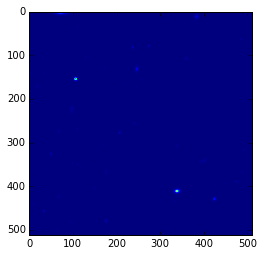


  file: demo.fits
  extension: 2
  type: IMAGE_HDU
  image info:
    data type: f8
    dims: [6,12,12]


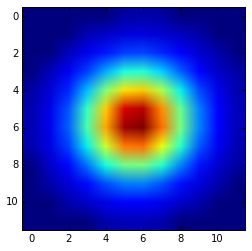


  file: demo.fits
  extension: 4
  type: IMAGE_HDU
  image info:
    data type: f8
    dims: [6,8,9]


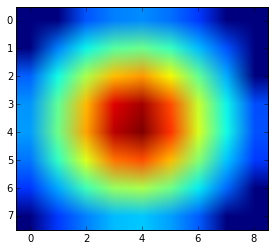

In [104]:
import fitsio
fits = fitsio.FITS('demo.fits')
#  # simulated survey image
# print fits[1] # analysis results
# print fits[1]['z'][1]


#all galaxies, simulated survey image 
print fits[0]
img = fits[0][:,:] #notice to get 512x512 image we do this
img = fits[0].read() #can also do this. 
plt.imshow(img)
plt.show()

#notice this again has 6 in first dimension (image + 5 partials) but the pixel size can vary.
print fits[2]
img = fits[2][:,:,:][0]
img = fits[2].read()[0]
plt.imshow(img)
plt.show()

#the first slicing [:,:,:] gets the datacube matrix from the file which at this point always includes
#the galaxy and 6 partials, then accessing each with [1] gets you the particular image of 8x9 pixels.
#in this case. 
print fits[4]
img = fits[4][:,:,:][0] 
plt.imshow(img)
plt.show()



In [89]:
print fits[2][0,:,:]
print fits[2][:,:,:][0] #they are the same array, just that one is a trivial 3dimensional matrix (one eleme)

[[    0.             0.             0.             0.             0.
     36.94903183    38.08202744    34.24047852     0.             0.             0.
      0.        ]
 [    0.             0.             0.            49.93744659
     70.36029053    85.94624329    88.97491455    77.76483917
     58.27023697    38.62261963     0.             0.        ]
 [    0.             0.            60.99767303   103.844841     155.66928101
    196.67860413   204.05499268   173.20721436   122.57371521
     75.07788086    41.81106186     0.        ]
 [    0.            54.63354111   108.9267807    199.19023132
    314.50973511   408.34970093   423.67428589   350.03036499
    235.35510254   134.4225769     68.9744339     33.77072906]
 [   36.76383209    80.3835144    170.60229492   328.66213989
    538.53057861   712.2911377    737.71490479   596.25982666   385.2076416
    208.44665527   100.45243073    46.04501724]
 [   44.62097931   101.39525604   222.76095581   441.29388428   736.9375
    982.8

In [86]:
print fits[2][:,:,:][1]

[[    0.             0.             0.             0.             0.
    -18.03494453     7.31183004    29.17799759     0.             0.             0.
      0.        ]
 [    0.             0.             0.          -100.05503082   -96.4940567
    -50.84775543    22.43888664    83.03843689   103.10797119    88.4805603
      0.             0.        ]
 [    0.             0.          -176.38171387  -246.39099121
   -250.80664062  -133.87675476    65.29941559   222.45756531
    259.01193237   204.84690857   129.00683594     0.        ]
 [    0.          -195.8324585   -358.48934937  -534.84313965
   -568.92993164  -305.45376587   164.13778687   517.98773193
    569.31207275   418.92755127   242.81362915   122.33355713]
 [ -144.37174988  -315.29071045  -611.6918335   -956.65509033
  -1048.77770996  -562.12506104   329.22131348   974.48132324
   1023.34161377   712.06347656   387.17425537   182.40548706]
 [ -184.34588623  -416.98095703  -834.44763184 -1336.8046875  -1485.13317871
   -78